「これならわかる機械学習入門」用、熱浴法のコード
- 富谷 昭夫 (著)
- KS物理専門書
- 2021/3/29
- 2023/09/14 更新

In [5]:
Lsize = 16 #(格子サイズ)

In [7]:
# 2d Ising model
import math
import random
import matplotlib.pyplot as plt
import numpy as np
# tqdm はプログレスバーを表示するためのライブラリ
from tqdm. notebook import tqdm

# 周期的境界条件を考慮してサイトの移動を管理
def xup(x):
  x+=1
  if x>=L[0]:
    x-=L[0] 
  return x
def yup(y): 
  y+=1
  if y>=L[1]:
    y-=L[1] 
  return y
def xdn(x):
  x-=1
  if x<0:
    x+=L[0]
  return x
def ydn(y):
  y-=1
  if y<0:
    y+=L[1]
  return y

# ある点 (x,y)の上下左右のスピンを合計する
def spin_sum(sc,x,y):
  h=0
  h+=sc[xup(x)][y]
  h+=sc[xdn(x)][y]
  h+=sc[x][yup(y)]
  h+=sc[x][ydn(y)]
  return h

# ある点 (x,y)の熱浴法を行う
def heatbath_local(beta,hz,sc,x,y):
  h = spin_sum(sc,x,y)-hz
  # このサイトが次に s=+1 となる確率を計算する 
  p = math.exp(beta*h)/(math.exp(beta*h) + math.exp(-beta*h))
  r = random.random()
  # 確率に基づいてランダムにs を決定する 
  if r < p: # success
    sc[x][y]=1
  else:
    sc[x][y]=-1
  return sc

# すべての (x,y)に対して熱浴法を行う 
def heatbath(beta,hz,sc):
  xlist = list(range(L[0]) ) 
  random.shuffle(xlist) 
  ylist = list(range(L[1]) ) 
  random.shuffle(ylist) 
  for x in xlist:
    for y in ylist:
      sc = heatbath_local(beta,hz,sc,x,y)
  return sc

# 磁化率を計算する
def magnetization (sc):
  m=0
  for x in range(L[0]):
    for y in range(L[1]):
      m+=sc[x][y]
  return m/(L[0]*L[1])

# モンテカルロ法の初期配位をセットする 
def init_conf_cold():
  sc = [[1]*L[1] for i in range(L[0])]
  return sc

def init_conf(init="cold"):
  sc = init_conf_cold()
  if init=="cold":
    return sc
  for x in range(L[0]): 
    for y in range(L[1]): 
      r = random.random() 
      if r<0.5:
        sc[x][y]=1
      else:
        sc[x][y]=-1
  return sc


  0%|          | 0/1000 [00:00<?, ?it/s]

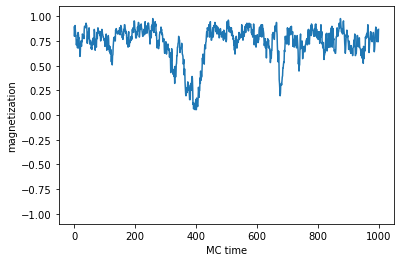

In [8]:
L = [Lsize,Lsize]
beta = 0.440687 
hz=0.0
Nsweep = 10**3
#
sc = init_conf()
mctime=[];mag_hist=[]
for isweep in tqdm(range(Nsweep)):
  sc = heatbath(beta,hz,sc)
  mag=magnetization(sc)
  mctime.append(isweep)
  mag_hist.append(mag)
plt.plot(mctime,mag_hist)
plt.ylim([-1.1,1.1])
plt.xlabel("MC time")
plt.ylabel("magnetization")
plt.show()

In [9]:
N_dis=10**2 # 捨てる個数
N_trj=10**3+N_dis # トータルのアップデート回数
N_sav=10 # アップデート 10回ごとに配位を保存
prm_list = [
# beta, #of_trj, #of_discard, file_name, save_every
  [0.90, N_trj, N_dis,f"conf/L{Lsize}b090_", N_sav],
  [0.85, N_trj, N_dis,f"conf/L{Lsize}b085_", N_sav],
  [0.80, N_trj, N_dis,f"conf/L{Lsize}b080_", N_sav],
  [0.70, N_trj, N_dis,f"conf/L{Lsize}b070_", N_sav],
  [0.65, N_trj, N_dis,f"conf/L{Lsize}b065_", N_sav],
  [0.60, N_trj, N_dis,f"conf/L{Lsize}b060_", N_sav],
  [0.55, N_trj, N_dis,f"conf/L{Lsize}b055_", N_sav],
  [0.50, N_trj, N_dis,f"conf/L{Lsize}b050_", N_sav], 
  [0.47, N_trj, N_dis,f"conf/L{Lsize}b047_", N_sav], 
  [0.42, N_trj, N_dis,f"conf/L{Lsize}b042_", N_sav], 
  [0.40, N_trj, N_dis,f"conf/L{Lsize}b040_", N_sav], 
  [0.35, N_trj, N_dis,f"conf/L{Lsize}b035_", N_sav], 
  [0.30, N_trj, N_dis,f"conf/L{Lsize}b030_", N_sav], 
  [0.25, N_trj, N_dis,f"conf/L{Lsize}b025_", N_sav], 
  [0.20, N_trj, N_dis,f"conf/L{Lsize}b020_", N_sav], 
  [0.15, N_trj, N_dis,f"conf/L{Lsize}b015_", N_sav], 
  [0.10, N_trj, N_dis,f"conf/L{Lsize}b010_", N_sav], 
  [0.05, N_trj, N_dis,f"conf/L{Lsize}b005_", N_sav], 
  [0.00, N_trj, N_dis,f"conf/L{Lsize}b000_", N_sav] 
  ]

beta=0.9 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.85 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.8 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.7 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.65 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.6 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.55 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.5 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.47 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.42 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.4 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.35 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.3 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.25 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.2 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.15 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.1 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.05 1100


  0%|          | 0/1100 [00:00<?, ?it/s]


beta=0.0 1100


  0%|          | 0/1100 [00:00<?, ?it/s]

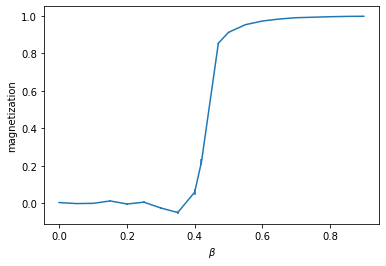

In [10]:
# conf ディレクトリがなければ作る
import os
os.makedirs("conf", exist_ok = True)
#
L = [Lsize,Lsize] # 格子サイズの設定
hz = -0.0005 # 相転移を見るために非常に弱い磁場を添加

nprm=len(prm_list) # パラメータリストの長さを調べる
betas = []
mags = []
mags_er = []
#
random.seed(12345)
sc = init_conf()
# 各ベータごとにパラメータを読み出して配位を作る
for ibeta in range(nprm):
  beta = prm_list[ibeta][0]
  Nsweep = prm_list[ibeta][1]
  Ndiscard = prm_list[ibeta][2]
  fname = prm_list[ibeta][3]
  save_every = prm_list[ibeta][4]
  conf_cnt = 0
#
  print(f"beta={beta} {Nsweep}")
  mag_hist=[]
  # 熱浴法で配位を作る
  for isweep in tqdm(range(Nsweep)):
    sc = heatbath(beta,hz,sc)
    mag=magnetization(sc)
    mag_hist.append(mag)
    if (isweep%save_every == 0)&(isweep>=Ndiscard):
      scn = np.array(sc)
      np.save(f"{fname}{conf_cnt}",scn)
      conf_cnt+=1
  #
  print("")
  mag_hist=np.array(mag_hist[Ndiscard:])
  mag = np.mean(mag_hist)
  mag_er = np.std(mag_hist)/np.sqrt(len(mag_hist)-1) #
  betas.append(beta)
  mags.append(mag)
  mags_er.append(mag_er)
  #
plt.xlabel(r"$\beta$")
plt.ylabel("magnetization")
plt.errorbar(betas,mags,yerr=mags_er)
plt.show()

# 前処理

In [11]:
nconf = 100 # 各ベータでの配位の数
betacr = 0.440686 # 正方イジング模型の相転移温度
#
data = []
labels = []
betas = []
nprm=len(prm_list)
for ibeta in range(nprm):
  beta = prm_list[ibeta][0]
  fname = prm_list[ibeta][3]
  for itrj in range(nconf):
    npsc = np.load(f"{fname}{itrj}.npy")
    data.append(npsc)
    if beta > betacr:
      labels.append([0,1]) # 低温相の one-hot ベクトル 
    else:
      labels.append([1,0]) # 高温相の one-hot ベクトル 
    betas.append(beta)
data = np.array(data)
labels = np.array(labels)
#
train_data=data[0::2]
train_labels=labels[0::2] 
train_betas=betas[0::2]  
#
val_data=data[1::2]
val_labels=labels[1::2] 
val_betas=betas[1::2]

In [12]:
print("train_data.shape = ", train_data.shape) 
print("val_data.shape = ", val_data.shape)
# train_data.shape = (950, 32, 32)
# val_data.shape = (950, 32, 32)

train_data.shape =  (950, 16, 16)
val_data.shape =  (950, 16, 16)
